# Joining Data with pandas

#### Course Description
Being able to combine and work with multiple datasets is an essential skill for any aspiring Data Scientist. pandas is a crucial cornerstone of the Python data science ecosystem, with Stack Overflow recording 5 million views for pandas questions. Learn to handle multiple DataFrames by combining, organizing, joining, and reshaping them using pandas. You'll work with datasets from the World Bank and the City Of Chicago. You will finish the course with a solid skillset for data-joining in pandas.

## [1] Data Merging Basics

Learn how you can merge disparate data using inner joins. By combining information from multiple sources you’ll uncover compelling insights that may have previously been hidden. You’ll also learn how the relationship between those sources, such as one-to-one or one-to-many, can affect your result.

### Chicago Dataset Discussion
**Chicago Data Portal Dataset**
- divided into 50 local neighborhoods called wards
- table with data about the local goverment offices in each ward

*Objective:*
- Merge the local government data with census data about the population of each ward

**Ward Data**

- from ward_offices.csv
- information about the local goverment of each ward, such as government office address
- has 50 rows and 4 columns
<br>

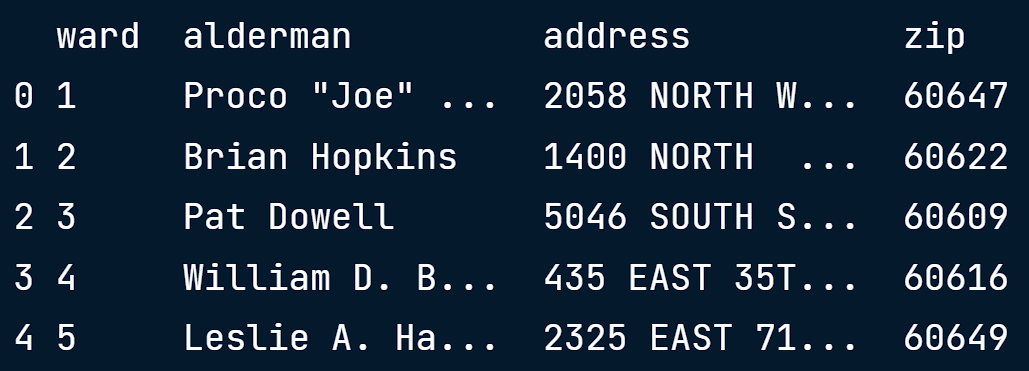

<br>

**Census Data**

- from ward_census.csv
- contains the population of each ward in 2000 and 2010, and the change as a percentage
- includes the address for the center of each ward
- has 50 rows and 6 columns

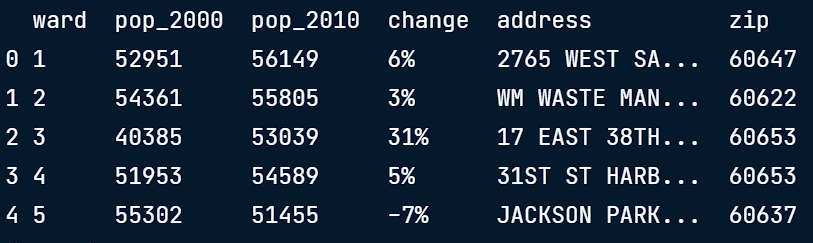

> Two dataframes are related by their ward column. Merging together matching the ward number from each row of the ward table to the ward numbers from the census table.


### Inner join
- will only return rows that have matching values in both tables
- `.merge()`
 - dataframe method used to perform merge
 - `"on"` - argument used to tell the method to merge the two tables on the ward column

> since the wards table is listed first, its column will appear first in the output

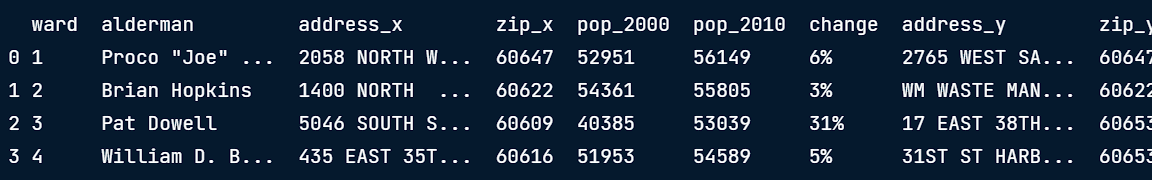

- to avoid multiple columns with the same name, they are automatically given a suffix by the merge method

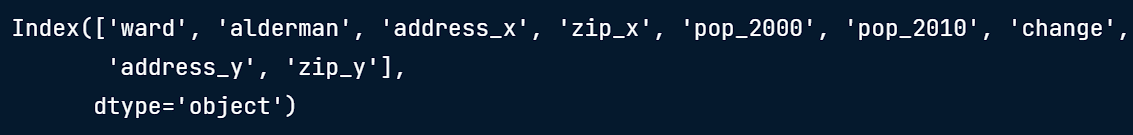

- `"suffixes"` - argument of the merge method to control suffix
- makes it easier to tell the difference between columns

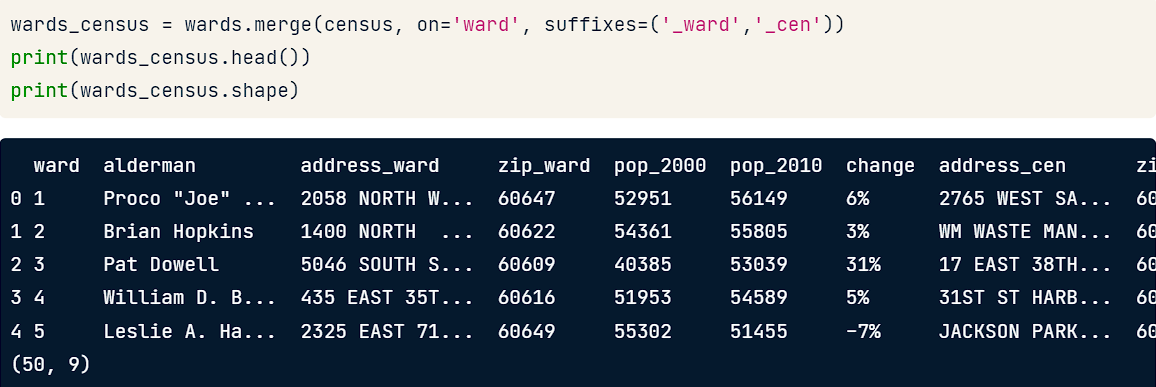

In [1]:
# Inner join 
# wards_census = wards.merge(census, on = 'ward')
# wards_census.head()

**What column to merge on?**

Chicago provides a list of taxicab owners and vehicles licensed to operate within the city, for public safety. Your goal is to merge two tables together. One table is called `taxi_owners`, with info about the taxi cab company owners, and one is called `taxi_veh`, with info about each taxi cab vehicle. Both the `taxi_owners` and `taxi_veh` tables have been loaded for you and you can explore them in the IPython shell.

Choose the column you would use to merge the two tables on using the .merge() method.
> `on = 'vid'` - both DataFrames contained the column vid. 

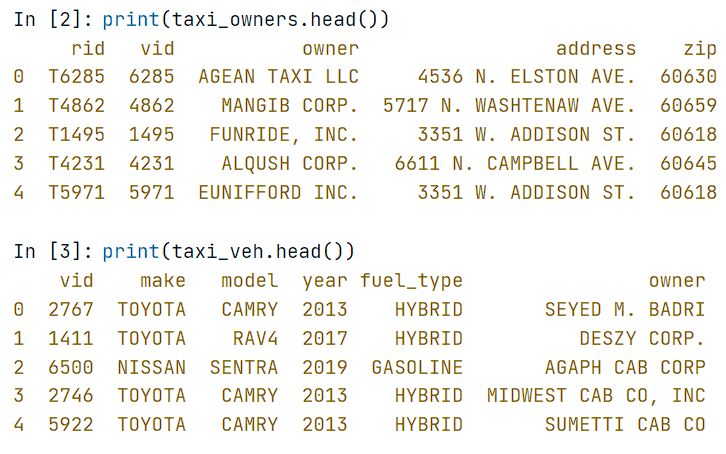

---

**Your first inner join**
You have been tasked with figuring out what the most popular types of fuel used in Chicago taxis are. To complete the analysis, you need to merge the `taxi_owners` and `taxi_veh` tables together on the `vid` column. You can then use the merged table along with the `.value_counts()` method to find the most common `fuel_type`.

In [2]:
import pandas as pd
import numpy as np

In [3]:
taxi_owners = pd.read_pickle("datasets/taxi_owners.p")

taxi_veh = pd.read_pickle("datasets/taxi_vehicles.p")

In [4]:
# Merge the taxi_owners and taxi_veh tables
taxi_own_veh = taxi_owners.merge(taxi_veh, on = 'vid')

# Print the column names of the taxi_own_veh
print(taxi_own_veh.columns)

Index(['rid', 'vid', 'owner_x', 'address', 'zip', 'make', 'model', 'year',
       'fuel_type', 'owner_y'],
      dtype='object')


In [5]:
# Merge the taxi_owners and taxi_veh tables setting a suffix
taxi_own_veh = taxi_owners.merge(taxi_veh, on = 'vid', suffixes = ('_own', '_veh'))

# Print the column names of taxi_own_veh
print(taxi_own_veh.columns)

Index(['rid', 'vid', 'owner_own', 'address', 'zip', 'make', 'model', 'year',
       'fuel_type', 'owner_veh'],
      dtype='object')


In [6]:
# Merge the taxi_owners and taxi_veh tables setting a suffix
taxi_own_veh = taxi_owners.merge(taxi_veh, on='vid', suffixes=('_own','_veh'))

# Print the value_counts to find the most popular fuel_type
print(taxi_own_veh['fuel_type'].value_counts())

HYBRID                    2792
GASOLINE                   611
FLEX FUEL                   89
COMPRESSED NATURAL GAS      27
Name: fuel_type, dtype: int64


> The most common fuel type for taxis in Chicago are hybrids.

**Inner joins and number of rows returned**

All of the merges you have studied to this point are called inner joins. It is necessary to understand that inner joins only return the rows with matching values in both tables. You will explore this further by reviewing the merge between the `wards` and `census` tables, then comparing it to merges of copies of these tables that are slightly altered, named `wards_altered`, and `census_altered`. The first row of the `wards` column has been changed in the altered tables. You will examine how this affects the merge between them. The tables have been loaded for you.

For this exercise, it is important to know that the `wards` and `census` tables start with 50 rows.

In [7]:
wards = pd.read_pickle('datasets/ward.p')

census = pd.read_pickle('datasets/census.p')

In [8]:
# Merge the wards and census tables on the ward column
wards_census = wards.merge(census, on = 'ward')

# Print the shape of wards_census
print('wards_census table shape:', wards_census.shape)

wards_census table shape: (50, 9)


*No wards_altered dataset provided.*

In [9]:
# Print the first few rows of the wards_altered table to view the change 
#print(wards_altered[['ward']].head())

# Merge the wards_altered and census tables on the ward column
#wards_altered_census = wards_altered.merge(census, on = 'ward')

# Print the shape of wards_altered_census
#print('wards_altered_census table shape:', wards_altered_census.shape)

>   ward <br>
    0  | 61 <br>
    1  |  2 <br>
    2  |  3 <br>
    3  |  4 <br>
    4  |  5 <br>
    
> wards_altered_census table shape: (49, 9)

In [10]:
# Print the first few rows of the census_altered table to view the change 
#print(census_altered[['ward']].head())

# Merge the wards and census_altered tables on the ward column
#wards_census_altered = wards.merge(census_altered, on = 'ward')

# Print the shape of wards_census_altered
#print('wards_census_altered table shape:', wards_census_altered.shape)

  ward <br>
    0  | None <br>
    1  |   2  <br>
    2  |   3  <br>
    3  |   4  <br>
    4  |   5  <br>

<p> wards_census_altered table shape: (49, 9) </p>

> In step 1, the `.merge()` returned a table with the same number of rows as the original wards table. 
  However, in steps 2 and 3, using the altered tables with the altered first row of the ward column, the number of returned rows was fewer. 
  There was not a matching value in the ward column of the other table. Remember that `.merge()` only returns rows where the values match in both tables.

---

### One-to-many relationships

#### One-to-one
- every row in the left table is related to one and only one row on the right table
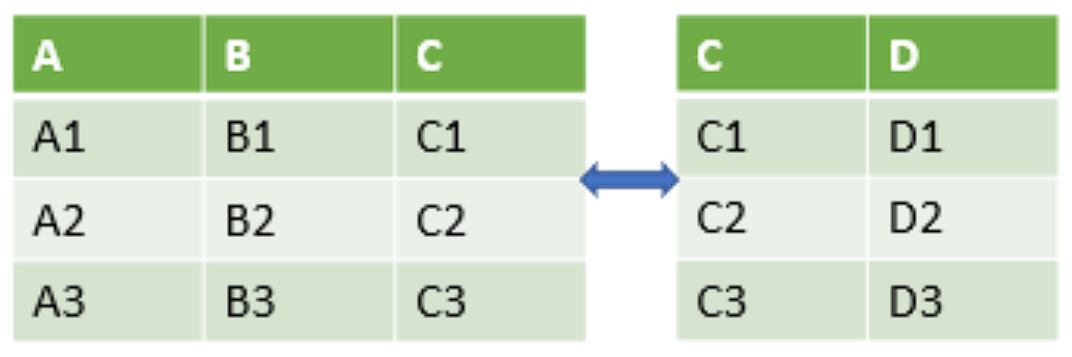

#### One-to-many
- every row in the left table is related to one or more rows in the right table
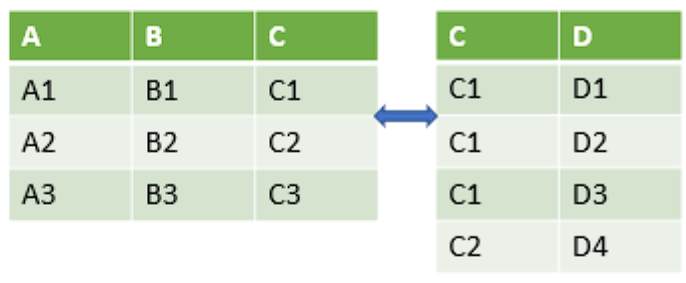

### One-to-many classification

Understanding the difference between a one-to-one and one-to-many relationship is a useful skill. In this exercise, consider a set of tables from an e-commerce website. The hypothetical tables are the following:

- A `customer` table with information about each customer
- A `cust_tax_info` table with customers unique tax IDs
- An `orders` table with information about each order
- A `products` table with details about each unique product sold
- An `inventory` table with information on how much total inventory is available to sell for each product

#### Answer


**One-to-one**
- The relationship between customer and cust_taX_info.
- The relationship between products and inventory.

**One-to-many**
- The relationship between customers and orders.
- The relationship between products and orders

#### One-to-many merge

A business may have one or multiple owners. In this exercise, you will continue to gain experience with one-to-many merges by merging a table of business owners, called `biz_owners`, to the `licenses` table. Recall from the video lesson, with a one-to-many relationship, a row in the left table may be repeated if it is related to multiple rows in the right table. In this lesson, you will explore this further by finding out what is the most common business owner title. (i.e., secretary, CEO, or vice president).

- Starting with the `licenses` table on the left, merge it to the `biz_owners` table on the column account, and save the results to a variable named `licenses_owners`.
- Group `licenses_owners` by `title` and count the number of accounts for each title. Save the result as `counted_df`.
- Sort `counted_df` by the number of **accounts** in **descending order**, and save this as a variable named `sorted_df`.
- Use the `.head()` method to print the first few rows of the `sorted_df`.

In [11]:
licenses = pd.read_pickle('datasets/licenses.p')

biz_owners = pd.read_pickle('datasets/business_owners.p')

In [12]:
licenses.head()

,account,ward,aid,business,address,zip
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616
1,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633
2,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632
3,10005,12,NaN,KRAFT FOODS NORTH AMERICA,2005 W 43RD ST,60609
4,10044,44,638,NEYBOUR'S TAVERN & GRILLE,3651 N SOUTHPORT AVE,60613


In [13]:
biz_owners.head()

,account,first_name,last_name,title
0,10,PEARL,SHERMAN,PRESIDENT
1,10,PEARL,SHERMAN,SECRETARY
2,10002,WALTER,MROZEK,PARTNER
3,10002,CELINA,BYRDAK,PARTNER
4,10005,IRENE,ROSENFELD,PRESIDENT


In [14]:
# Merge the licenses and biz_owners table on account, store as licenses_owners
licenses_owners = licenses.merge(biz_owners, on = 'account')

# Group licenses_owners by title and count the number of accounts for each title. Save the result as counted_df
counted_df = licenses_owners.groupby('title').agg({'account': 'count'})

# Sort counted_df by the number of accounts in descending order, and save this as a variable named sorted_df.
sorted_df = counted_df.sort_values('account', ascending = False)

# Use the .head() method to print the first few rows of the sorted_df.
sorted_df.head()

,account
title,
PRESIDENT,6259
SECRETARY,5205
SOLE PROPRIETOR,1658
OTHER,1200
VICE PRESIDENT,970


>  After merging the tables together, you counted the number of repeated rows with the combination of .groupby() and .agg() statements. You see that president, followed by secretary, are the most common business owner titles.

---

###  Merging multiple DataFrames

#### Review new data
**small_business_grant_aggreement.csv"
- a table of businesses that have received small business grant money from Chicago
- the tax are funded by taxpayer money
  - analyze how much grant money each business received and in what ward that business is located
  - determine if one ward's businesses received a disproportionaly large amount of grant money

#### Single Merge
- `grants.merge(licenses, on = ['address', 'zip'])`
  - both the address and the zip code of a row in the left table match the address and zip code of a row in the right table in order for them to be linked to each other in the merge
  
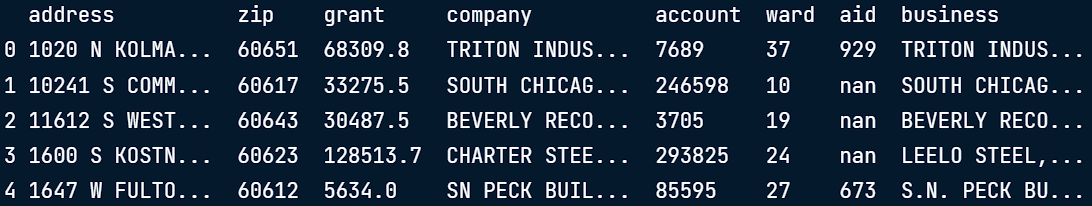

#### Merging Multiple Tables
- `grants.merge(licenses, on = ['address', 'zip']) \ 
         .merge(wards, on = 'ward', suffixes = ('_bus', '_ward'))`
   - using the Python's backslash line continuation method to add the second merge on the next line

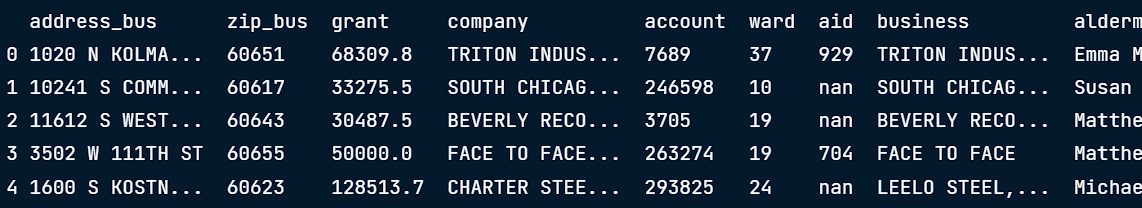

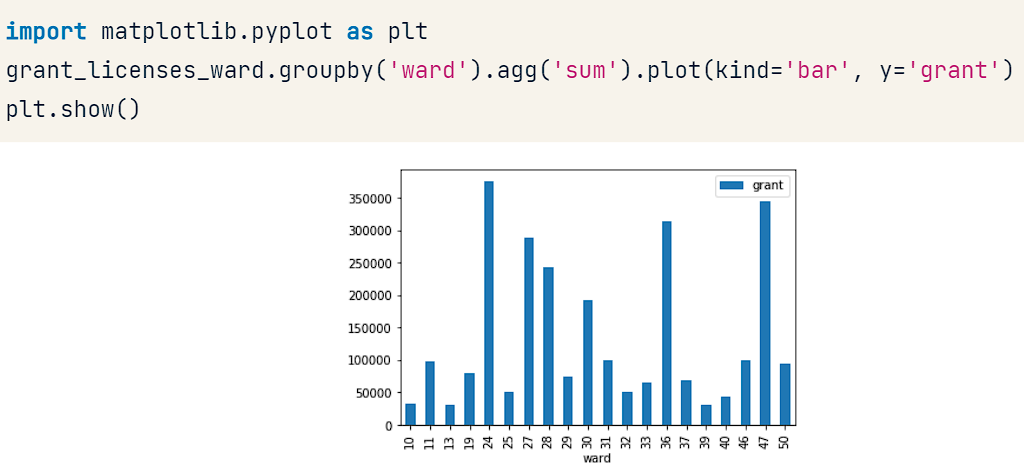

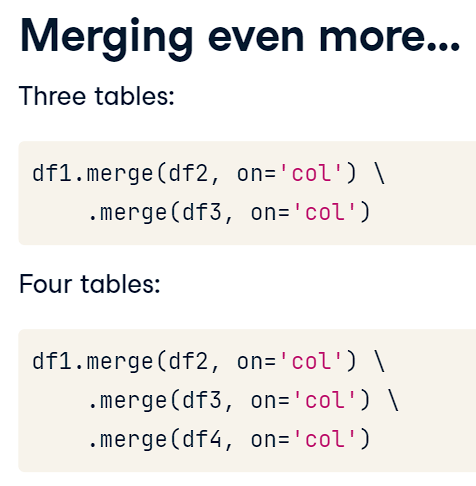

---

#### Total riders in a month
Your goal is to find the total number of rides provided to passengers passing through the Wilson station (`station_name == 'Wilson'`) when riding Chicago's public transportation system on weekdays (`day_type == 'Weekday'`) in July (`month == 7`). Luckily, Chicago provides this detailed data, but it is in three different tables. You will work on merging these tables together to answer the question. This data is different from the business related data you have seen so far, but all the information you need to answer the question is provided.

The `cal`, `ridership`, and `stations` DataFrames have been loaded for you. The relationship between the tables can be seen in the diagram below.
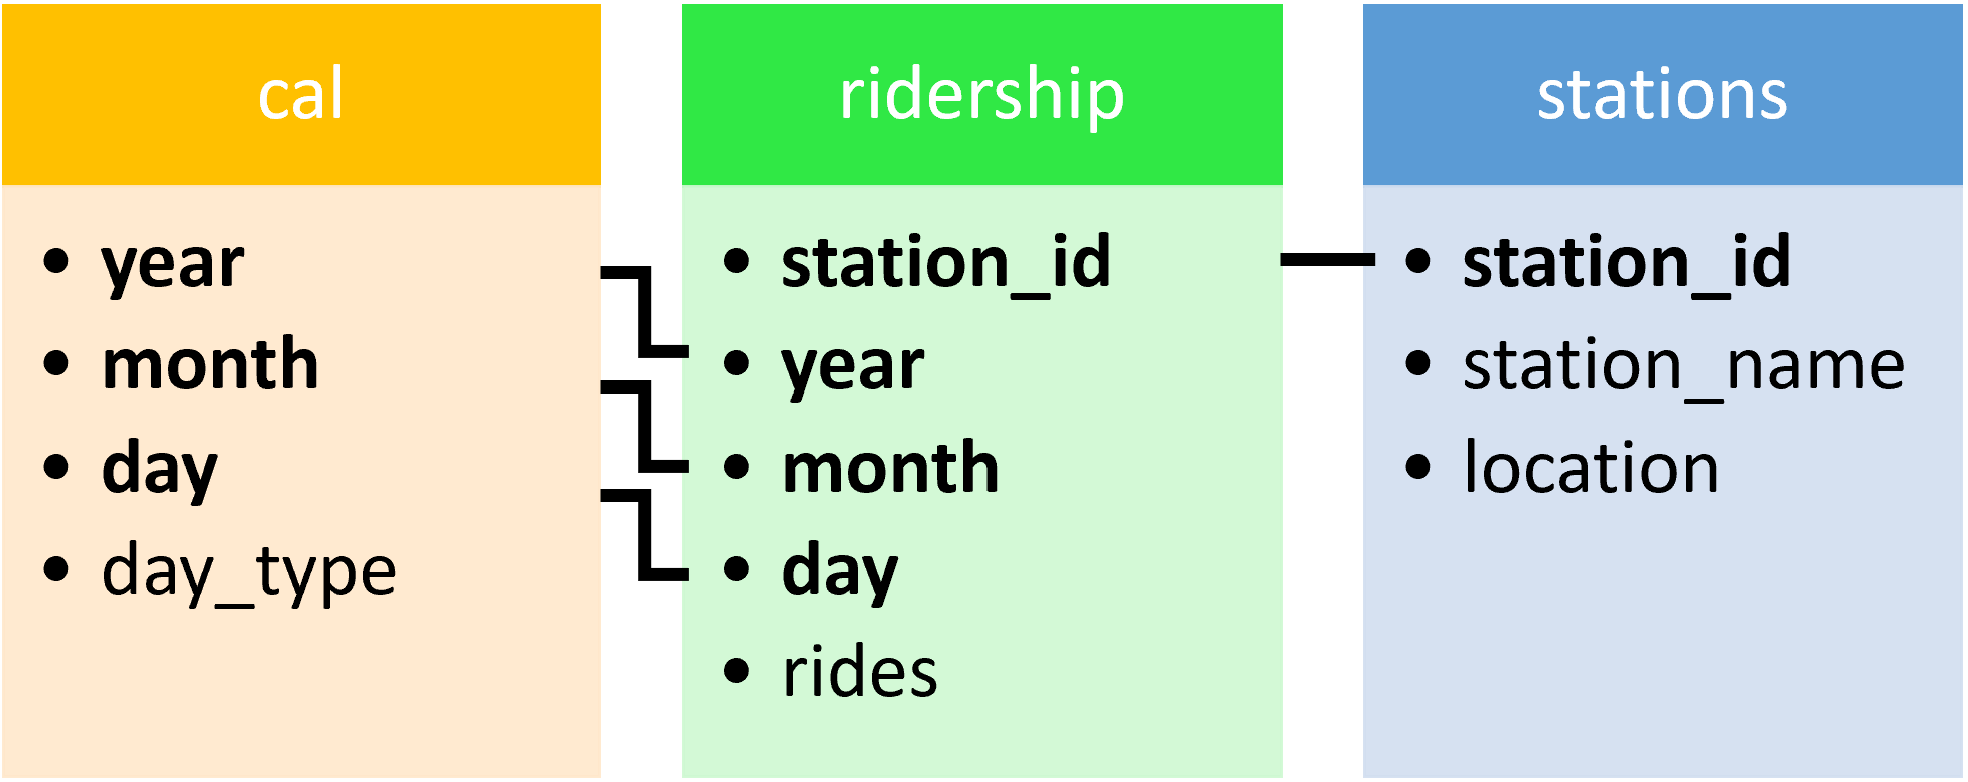

- Merge the `ridership` and `cal` tables together, starting with the `ridership` table on the left and save the result to the variable `ridership_cal`. If you code takes too long to run, your merge conditions might be incorrect.
- Extend the previous merge to three tables by also merging the `stations` table.
- Create a variable called `filter_criteria` to select the appropriate rows from the merged table so that you can sum the `rides` column.

In [15]:
ridership = pd.read_pickle('datasets/cta_ridership.p')
stations = pd.read_pickle('datasets/stations.p')
cal = pd.read_pickle('datasets/cta_calendar.p')

In [16]:
# Merge the ridership and cal tables
ridership_cal = ridership.merge(cal, on = ['year', 'month', 'day'])

In [17]:
# Merge the ridership, cal, and stations tables
ridership_cal_stations = ridership.merge(cal, on = ['year','month','day']) \
            				.merge(stations, on = 'station_id')

In [18]:
# Merge the ridership, cal, and stations tables
ridership_cal_stations = ridership.merge(cal, on=['year','month','day']) \
							.merge(stations, on='station_id')

# Create a filter to filter ridership_cal_stations
filter_criteria = ((ridership_cal_stations['month'] == 7) 
                   & (ridership_cal_stations['day_type'] == 'Weekday') 
                   & (ridership_cal_stations['station_name'] == 'Wilson'))

# Use .loc and the filter to select for rides
print(ridership_cal_stations.loc[filter_criteria, 'rides'].sum())

140005


> Finally, you found out that the Wilson station had **140,005 riders** during **weekdays in July**.

**Three table merge**

To solidify the concept of a three DataFrame merge, practice another exercise. A reasonable extension of our review of Chicago business data would include looking at demographics information about the neighborhoods where the businesses are. A table with the median income by zip code has been provided to you. You will merge the `licenses` and `wards` tables with this new income-by-zip-code table called `zip_demo`.

- Starting with the `licenses` table, merge to it the `zip_demo` table on the `zip` column. Then merge the resulting table to the `wards` table on the `ward` column. Save result of the three merged tables to a variable named `licenses_zip_ward`.
- Group the results of the three merged tables by the column `alderman` and find the median `income`.

In [19]:
zip_demo = pd.read_pickle('datasets/zip_demo.p')

In [20]:
# Merge licenses and zip_demo, on zip; and merge the wards on ward
licenses_zip_ward = licenses.merge(zip_demo, on = 'zip') \
            			.merge(wards, on = 'ward')

In [21]:
# Merge licenses and zip_demo, on zip; and merge the wards on ward
licenses_zip_ward = licenses.merge(zip_demo, on = 'zip') \
            			.merge(wards, on = 'ward')

# Print the results by alderman and show median income
pd.DataFrame(licenses_zip_ward.groupby('alderman').agg({'income':'median'}))

,income
alderman,
Ameya Pawar,66246
Anthony A. Beale,38206
Anthony V. Napolitano,82226
Ariel E. Reyboras,41307
Brendan Reilly,110215
Brian Hopkins,87143
Carlos Ramirez-Rosa,66246
Carrie M. Austin,38206
Chris Taliaferro,55566


> You see that only a few aldermen represent businesses in areas where the median income is greater than $62,000, which is the median income for the state of Illinois.

**One-to-many merge with multiple tables**

In this exercise, assume that you are looking to start a business in the city of Chicago. Your perfect idea is to start a company that uses goats to mow the lawn for other businesses. However, you have to choose a location in the city to put your goat farm. You need a location with a great deal of space and relatively few businesses and people around to avoid complaints about the smell. You will need to merge three tables to help you choose your location. The `land_use` table has info on the percentage of vacant land by city ward. The `census` table has population by ward, and the `licenses` table lists businesses by ward.

- Merge `land_use` and `census` on the `ward` column. Merge the result of this with `licenses` on the `ward` column, using the suffix `_cen` for the left table and `_lic` for the right table. Save this to the variable `land_cen_lic`.
- Group `land_cen_lic` by `ward`, `pop_2010` (the population in 2010), and `vacant`, then count the number of `accounts`. Save the results to `pop_vac_lic`.
- Sort `pop_vac_lic` by `vacant`, `account`, and `pop_2010` in descending, ascending, and ascending order respectively. Save it as `sorted_pop_vac_lic`.

In [22]:
land_use = pd.read_pickle('datasets/land_use.p')

In [23]:
# Merge land_use and census and merge result with licenses including suffixes
land_cen_lic = land_use.merge(census, on = 'ward') \
                       .merge(licenses, on = 'ward', suffixes = ('_cen', '_lic'))

In [24]:
# Merge land_use and census and merge result with licenses including suffixes
land_cen_lic = land_use.merge(census, on='ward') \
                    .merge(licenses, on='ward', suffixes=('_cen','_lic'))

# Group by ward, pop_2010, and vacant, then count the # of accounts
pop_vac_lic = land_cen_lic.groupby(['ward', 'pop_2010', 'vacant'], 
                                   as_index=False).agg({'account':'count'})

In [25]:
# Merge land_use and census and merge result with licenses including suffixes
land_cen_lic = land_use.merge(census, on='ward') \
                    .merge(licenses, on='ward', suffixes=('_cen','_lic'))

# Group by ward, pop_2010, and vacant, then count the # of accounts
pop_vac_lic = land_cen_lic.groupby(['ward','pop_2010','vacant'], 
                                   as_index=False).agg({'account':'count'})

# Sort pop_vac_lic and print the results
sorted_pop_vac_lic = pop_vac_lic.sort_values(['vacant','account','pop_2010'], 
                                             ascending=[False, True, True])

# Print the top few rows of sorted_pop_vac_lic
pd.DataFrame(sorted_pop_vac_lic.head())

,ward,pop_2010,vacant,account
47,7,51581,19,80
12,20,52372,15,123
1,10,51535,14,130
16,24,54909,13,98
7,16,51954,13,156


--- 

# [2] Left Join

- returns all rows of data from the left table and only those rows from the right table where the key columns match

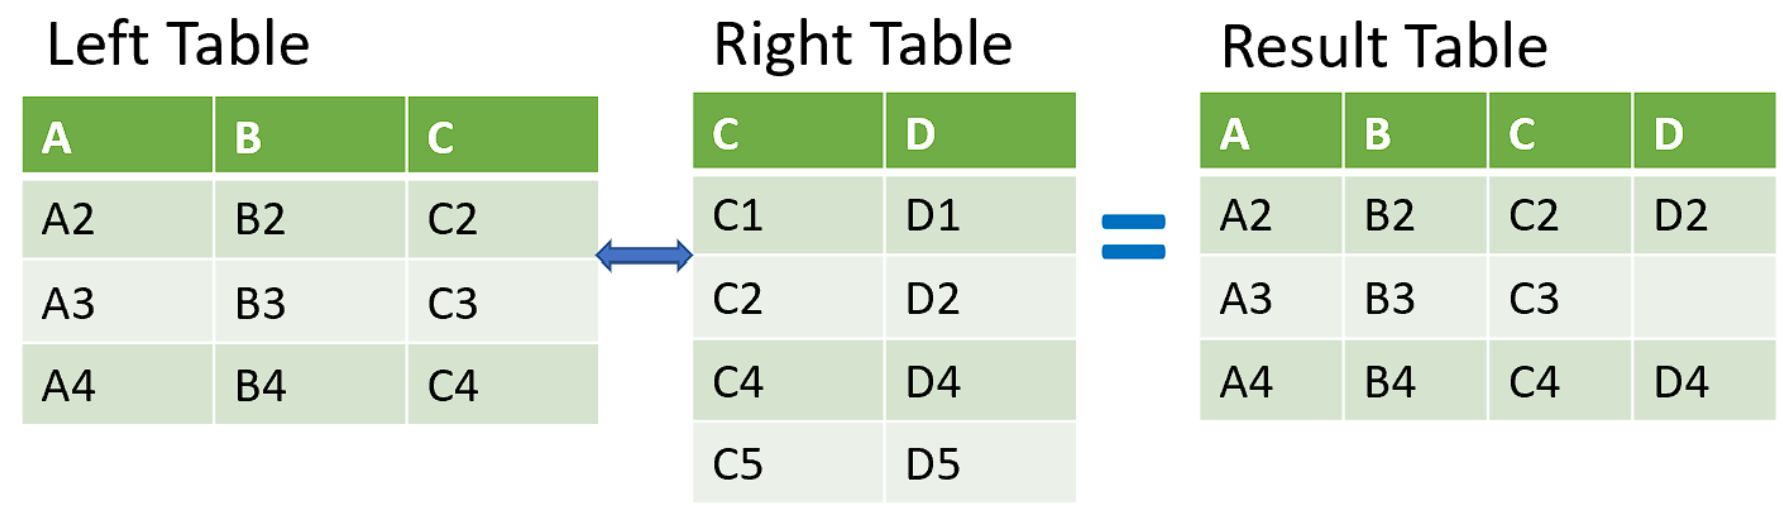

### Movie Dataset
- a community-built movie database with information on thousands of movies, their casts, and popularity

In [26]:
movies = pd.read_pickle("datasets/movies.p")
taglines = pd.read_pickle("datasets/taglines.p")

In [27]:
print(movies.shape)
print(movies.head())

(4803, 4)
      id                 title  popularity release_date
0    257          Oliver Twist   20.415572   2005-09-23
1  14290  Better Luck Tomorrow    3.877036   2002-01-12
2  38365             Grown Ups   38.864027   2010-06-24
3   9672              Infamous    3.680896   2006-11-16
4  12819       Alpha and Omega   12.300789   2010-09-17


In [28]:
print(taglines.shape)
print(taglines.head())

(3955, 2)
       id                                         tagline
0   19995                     Enter the World of Pandora.
1     285  At the end of the world, the adventure begins.
2  206647                           A Plan No One Escapes
3   49026                                 The Legend Ends
4   49529            Lost in our world, found in another.


#### 'how' argument
- defines how to merge the two tables
- default: 'inner'

In [29]:
# Merge with left join

movie_taglines = movies.merge(taglines, on = 'id', how = 'left')
movie_taglines.head()

,id,title,popularity,release_date,tagline
0,257,Oliver Twist,20.415572,2005-09-23,NaN
1,14290,Better Luck Tomorrow,3.877036,2002-01-12,Never underestimate an overachiever.
2,38365,Grown Ups,38.864027,2010-06-24,Boys will be boys. . . some longer than others.
3,9672,Infamous,3.680896,2006-11-16,There's more to the story than you know
4,12819,Alpha and Omega,12.300789,2010-09-17,A Pawsome 3D Adventure


> In a one-to-one merge, a left join will always return the same number rows as the left table.

**Counting missing rows with left join**

The Movie Database is supported by volunteers going out into the world, collecting data, and entering it into the database. This includes financial data, such as movie budget and revenue. If you wanted to know which movies are still missing data, you could use a left join to identify them. Practice using a left join by merging the `movies` table and the `financials` table.

In [30]:
financials = pd.read_pickle('datasets/financials.p')

In [31]:
movies.head()

,id,title,popularity,release_date
0,257,Oliver Twist,20.415572,2005-09-23
1,14290,Better Luck Tomorrow,3.877036,2002-01-12
2,38365,Grown Ups,38.864027,2010-06-24
3,9672,Infamous,3.680896,2006-11-16
4,12819,Alpha and Omega,12.300789,2010-09-17


In [32]:
financials.head()

,id,budget,revenue
0,19995,237000000,2.787965e+09
1,285,300000000,9.610000e+08
2,206647,245000000,8.806746e+08
3,49026,250000000,1.084939e+09
4,49529,260000000,2.841391e+08


- Merge the `movies` table, as the left table, with the `financials` table using a left join, and save the result to `movies_financials`.

In [33]:
# Merge movies and financials with a left join
movies_financials = movies.merge(financials, on = 'id', how = 'left')
movies_financials.head()

,id,title,popularity,release_date,budget,revenue
0,257,Oliver Twist,20.415572,2005-09-23,50000000.0,42093706.0
1,14290,Better Luck Tomorrow,3.877036,2002-01-12,NaN,NaN
2,38365,Grown Ups,38.864027,2010-06-24,80000000.0,271430189.0
3,9672,Infamous,3.680896,2006-11-16,13000000.0,1151330.0
4,12819,Alpha and Omega,12.300789,2010-09-17,20000000.0,39300000.0


- Count the number of rows in `movies_financials` with a null value in the `budget` column

In [34]:
# Merge the movies table with the financials table with a left join
movies_financials = movies.merge(financials, on='id', how='left')

# Count the number of rows in the budget column that are missing
number_of_missing_fin = movies_financials['budget'].isna().sum()

# Print the number of movies missing financials
print(number_of_missing_fin)

1574


**Enriching a dataset**

Setting `how = 'left'` with the `.merge()` method is a useful technique for enriching or enhancing a dataset with additional information from a different table. In this exercise, you will start off with a sample of movie data from the movie series Toy Story. Your goal is to enrich this data by adding the marketing tag line for each movie. You will compare the results of a left join versus an inner join.

- Merge `toy_story` and `taglines` on the `id` column with a left join, and save the result as `toystory_tag`.
- With `toy_story` as the left table, merge to it `taglines` on the `id` column with an **inner join**, and save as toystory_tag.

*There's no toy_story dataset provided.*

In [35]:
# Merge the toy_story and taglines tables with a left join
#toystory_tag = toy_story.merge(taglines, on = 'id', how = 'left')

# Print the rows and shape of toystory_tag
#print(toystory_tag)
#print(toystory_tag.shape)

In [36]:
# Merge the toy_story and taglines tables with a inner join
#toystory_tag = toy_story.merge(taglines, on = 'id')

# Print the rows and shape of toystory_tag
#print(toystory_tag)
#print(toystory_tag.shape)

> If your goal is to enhance or enrich a dataset, then you do not want to lose any of your original data. A left join will do that by returning all of the rows of your left table, while using an inner join may result in lost data if it does not exist in both tables.

---

> A left join will return all of the rows from the left table. If those rows in the left table match multiple rows in the right table, then all of those rows will be returned. Therefore, the returned rows must be equal to if not greater than the left table. Knowing what to expect is useful in troubleshooting any suspicious merges.

## Other Joins

#### Right Joins
- it will return all of the rows from the right table and includes only those rows from the left table that have matching values.

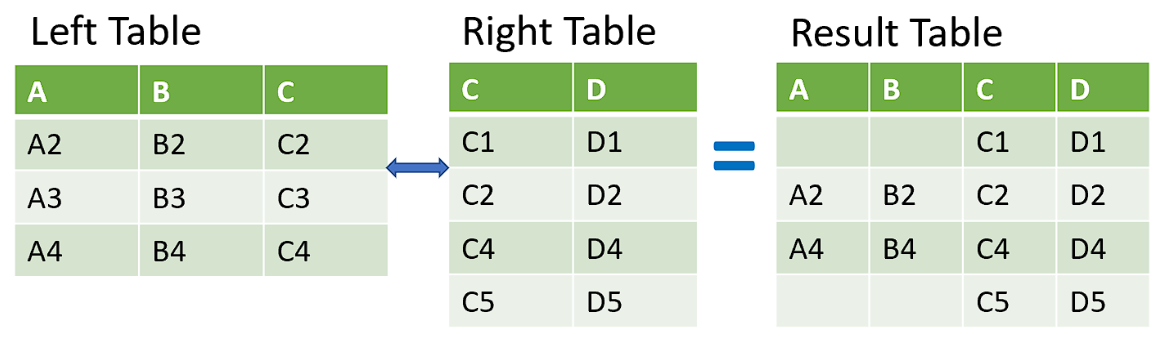

In [37]:
movies_to_genres = pd.read_pickle('datasets/movie_to_genres.p')
movies_to_genres.head()

,movie_id,genre
0,5,Crime
1,5,Comedy
2,11,Science Fiction
3,11,Action
4,11,Adventure


In [38]:
tv_genre = movies_to_genres[movies_to_genres['genre'] == 'TV Movie']
tv_genre.head()

,movie_id,genre
4998,10947,TV Movie
5994,13187,TV Movie
7443,22488,TV Movie
10061,78814,TV Movie
10790,153397,TV Movie


##### The goal is to merge it with the movies table.
- Use a right join to check that the movies table is not missing data.

#### Arguments
- `left_on` and `right_on`
    - allows to tell the merge which key columns from each table to merge the tables.

In [39]:
# movies is listed as the left table, so id is set as left_on and movie_id is set as right_on
tv_movies = movies.merge(tv_genre, how = 'right', left_on = 'id', right_on = 'movie_id')
tv_movies.head()

,id,title,popularity,release_date,movie_id,genre
0,10947,High School Musical,16.536374,2006-01-20,10947,TV Movie
1,13187,A Charlie Brown Christmas,8.701183,1965-12-09,13187,TV Movie
2,22488,Love's Abiding Joy,1.128559,2006-10-06,22488,TV Movie
3,78814,We Have Your Husband,0.102003,2011-11-12,78814,TV Movie
4,153397,Restless,0.812776,2012-12-07,153397,TV Movie


### Outer Join
- returns all of the row from both tables regardless if there is a match between the tables
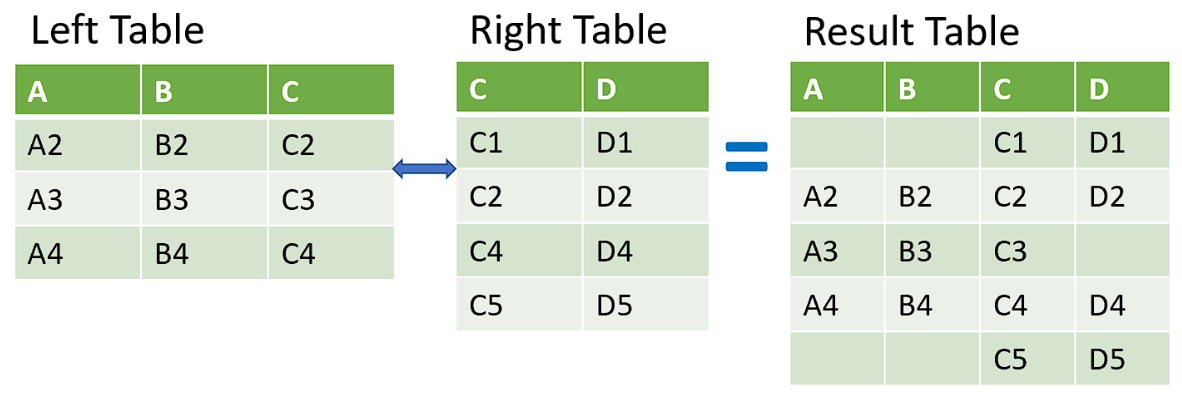

In [40]:
# datasets for outer join

m = movies_to_genres['genre'] == 'Family'
family = movies_to_genres[m].head(3)
family

,movie_id,genre
5,12,Family
33,35,Family
111,105,Family


In [41]:
m = movies_to_genres['genre'] == 'Comedy'
comedy = movies_to_genres[m].head(3)
comedy

,movie_id,genre
1,5,Comedy
7,13,Comedy
35,35,Comedy


In [42]:
# merge with outer join

family_comedy = family.merge(comedy, on = 'movie_id', how = 'outer', suffixes = ('_fam', '_com'))
family_comedy.head()

,movie_id,genre_fam,genre_com
0,12,Family,NaN
1,35,Family,Comedy
2,105,Family,NaN
3,5,NaN,Comedy
4,13,NaN,Comedy


**Right join to find unique movies**

Most of the recent big-budget science fiction movies can also be classified as action movies. You are given a table of science fiction movies called `scifi_movies` and another table of action movies called `action_movies`. Your goal is to find which movies are considered only science fiction movies. Once you have this table, you can merge the `movies` table in to see the movie names. Since this exercise is related to science fiction movies, use a right join as your superhero power to solve this problem.

- Merge `action_movies` and `scifi_movies` tables with a **right join** on `movie_id`. Save the result as `action_scifi`.
- Update the merge to add suffixes, where `'_act'` and `'_sci'` are suffixes for the left and right tables, respectively.
- From `action_scifi`, subset only the rows where the `genre_act` column is null.
- Merge `movies` and `scifi_only` using the `id` column in the left table and the `movie_id` column in the right table with an inner join.

In [43]:
genres = pd.read_pickle('datasets/movie_to_genres.p')
scifi_movies = genres[genres['genre'] == 'Science Fiction']
action_movies = genres[genres['genre'] == 'Action']

In [44]:
action_movies.head()

,movie_id,genre
3,11,Action
14,18,Action
25,22,Action
26,24,Action
42,58,Action


In [45]:
scifi_movies.head()

,movie_id,genre
2,11,Science Fiction
17,18,Science Fiction
20,19,Science Fiction
38,38,Science Fiction
49,62,Science Fiction


In [46]:
# Merge action_movies to scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on = 'movie_id', how = 'right')
action_scifi.head()

,movie_id,genre_x,genre_y
0,11,Action,Science Fiction
1,18,Action,Science Fiction
2,19,NaN,Science Fiction
3,38,NaN,Science Fiction
4,62,NaN,Science Fiction


In [47]:
# Merge action_movies to scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right',
                                   suffixes = ('_act', '_sci'))

# Print the first few rows of action_scifi to see the structure
action_scifi.head()

,movie_id,genre_act,genre_sci
0,11,Action,Science Fiction
1,18,Action,Science Fiction
2,19,NaN,Science Fiction
3,38,NaN,Science Fiction
4,62,NaN,Science Fiction


In [48]:
# Merge action_movies to the scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right',
                                   suffixes=('_act','_sci'))

# From action_scifi, select only the rows where the genre_act column is null
scifi_only = action_scifi[action_scifi['genre_act'].isnull()]
scifi_only.head()

,movie_id,genre_act,genre_sci
2,19,NaN,Science Fiction
3,38,NaN,Science Fiction
4,62,NaN,Science Fiction
5,68,NaN,Science Fiction
6,74,NaN,Science Fiction


In [49]:
# Merge action_movies to the scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right',
                                   suffixes=('_act','_sci'))

# From action_scifi, select only the rows where the genre_act column is null
scifi_only = action_scifi[action_scifi['genre_act'].isnull()]

# Merge the movies and scifi_only tables with an inner join
movies_and_scifi_only = movies.merge(scifi_only, left_on = 'id', right_on = 'movie_id', how = 'inner')

# Print the first few rows and shape of movies_and_scifi_only
print(movies_and_scifi_only.head())
print(movies_and_scifi_only.shape)

      id                         title  popularity release_date  movie_id  \
0  18841  The Lost Skeleton of Cadavra    1.680525   2001-09-12     18841   
1  26672     The Thief and the Cobbler    2.439184   1993-09-23     26672   
2  15301      Twilight Zone: The Movie   12.902975   1983-06-24     15301   
3   8452                   The 6th Day   18.447479   2000-11-17      8452   
4   1649    Bill & Ted's Bogus Journey   11.349664   1991-07-19      1649   

  genre_act        genre_sci  
0       NaN  Science Fiction  
1       NaN  Science Fiction  
2       NaN  Science Fiction  
3       NaN  Science Fiction  
4       NaN  Science Fiction  
(258, 7)


> You found over 250 action only movies by merging `action_movies` and `scifi_movies` using a right join. With this, you were able to find the rows not found in the `action_movies` table.

**Popular genres with right join**

What are the genres of the most popular movies? To answer this question, you need to merge data from the `movies` and `movie_to_genres` tables. In a table called `pop_movies`, the top 10 most popular movies in the movies table have been selected. To ensure that you are analyzing all of the popular movies, merge it with the movie_to_genres table using a right join. To complete your analysis, count the number of different genres. Also, the two tables can be merged by the movie ID. However, in `pop_movies` that column is called `id`, and in `movies_to_genres` it's called `movie_id`.

- Merge `movie_to_genres` and `pop_movies` using a right join. Save the results as `genres_movies`.
- Group `genres_movies` by `genre` and count the number of `id` values.

In [50]:
import matplotlib.pyplot as plt

In [66]:
# Use right join to merge the movie_to_genres and pop_movies tables
# genres_movies = movies_to_genres.merge(pop_movies, how = 'right', 
#                                      left_on = 'movie_id', 
#                                      right_on = 'id')

# Count the number of genres
#genre_count = genres_movies.groupby('genre').agg({'id':'count'})

# Plot a bar chart of the genre_count
#genre_count.plot(kind = 'bar')
#plt.show()

> You see from the results that adventure and action are the most popular genres.
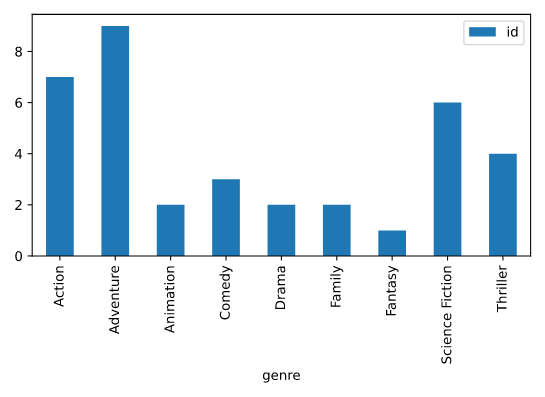

**Using outer join to select actors**

One cool aspect of using an outer join is that, because it returns all rows from both merged tables and null where they do not match, you can use it to find rows that do not have a match in the other table. To try for yourself, you have been given two tables with a list of actors from two popular movies: Iron Man 1 and Iron Man 2. Most of the actors played in both movies. Use an outer join to find actors who **did not** act in both movies.

The Iron Man 1 table is called `iron_1_actors`, and Iron Man 2 table is called `iron_2_actors`. Both tables have been loaded for you and a few rows printed so you can see the structure.
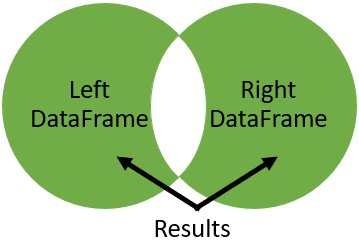

- Save to `iron_1_and_2` the merge of `iron_1_actors` (left) with `iron_2_actors` tables with an outer join on the `id` column, and set suffixes to `('_1','_2')`.
- Create an index that returns `True` if `name_1` or `name_2` are null, and `False` otherwise.

*There's no iron man datasets provided.*

In [71]:
# Merge iron_1_actors to iron_2_actors on id with outer join using suffixes
#iron_1_and_2 = iron_1_actors.merge(iron_2_actors,
#                                     how = 'outer',
#                                     on = 'id',
#                                     suffixes = ('_1', '_2'))

# Create an index that returns true if name_1 or name_2 are null
# m = ((iron_1_and_2['name_1'].isnull()) | 
#     (iron_1_and_2['name_2'].isnull()))

# Print the first few rows of iron_1_and_2
#print(iron_1_and_2[m].head())

### Self - join
- merging a table to itself


### Sequel Dataset
- has three columns
    - id - movie id
    - title - name of the movie
    - sequel - refers to the movie id that is a sequel to the original movie

**Objective**: See a table with the movies and the corresponding sequel movie in one row of the table, merging the table to itself is necessary 

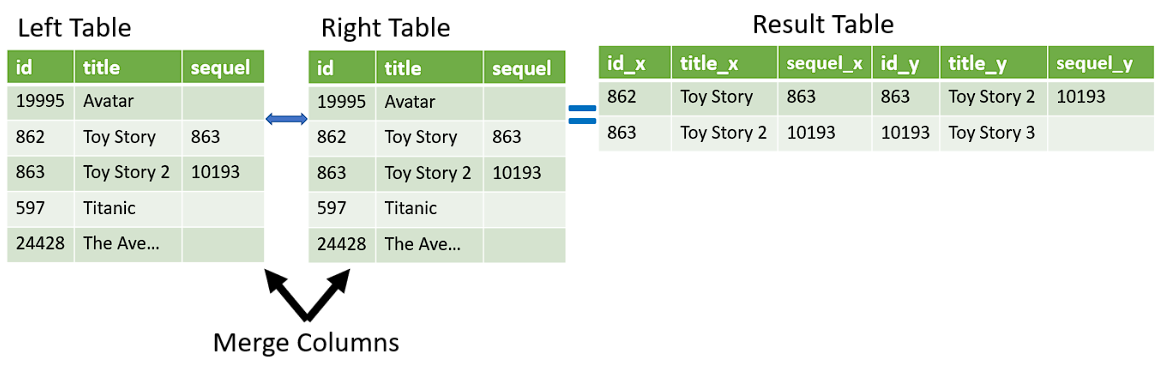

In [78]:
sequel = pd.read_pickle('datasets/sequels.p')
sequel.head()

,id,title,sequel
0,19995,Avatar,<NA>
1,862,Toy Story,863
2,863,Toy Story 2,10193
3,597,Titanic,<NA>
4,24428,The Avengers,<NA>


In [82]:
og_sequels = sequel.merge(sequel, left_on = 'sequel', right_on = 'id', suffixes = ('_org', '_seq'))
og_sequels.head()

,id_org,title_org,sequel_org,id_seq,title_seq,sequel_seq
0,862,Toy Story,863,863,Toy Story 2,10193
1,863,Toy Story 2,10193,10193,Toy Story 3,<NA>
2,675,Harry Potter and the Order of the Phoenix,767,767,Harry Potter and the Half-Blood Prince,<NA>
3,121,The Lord of the Rings: The Two Towers,122,122,The Lord of the Rings: The Return of the King,<NA>
4,120,The Lord of the Rings: The Fellowship of the Ring,121,121,The Lord of the Rings: The Two Towers,122


In [88]:
og_sequels[['title_org', 'title_seq']].head()

,title_org,title_seq
0,Toy Story,Toy Story 2
1,Toy Story 2,Toy Story 3
2,Harry Potter and the Order of the Phoenix,Harry Potter and the Half-Blood Prince
3,The Lord of the Rings: The Two Towers,The Lord of the Rings: The Return of the King
4,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Two Towers


In [89]:
l_og_sequels = sequel.merge(sequel, how = 'left', left_on = 'sequel', right_on = 'id', suffixes = ('_org', '_seq'))
l_og_sequels.head()

,id_org,title_org,sequel_org,id_seq,title_seq,sequel_seq
0,19995,Avatar,<NA>,<NA>,NaN,<NA>
1,862,Toy Story,863,863,Toy Story 2,10193
2,863,Toy Story 2,10193,10193,Toy Story 3,<NA>
3,597,Titanic,<NA>,<NA>,NaN,<NA>
4,24428,The Avengers,<NA>,<NA>,NaN,<NA>


##### When to merge at table to itself
Common Situations:
- Hieratchical relationships (like employee and manager)
- Sequential relationships (like logistic movements)
- Graph data (like networks of friends)

**Self join**

Merging a table to itself can be useful when you want to compare values in a column to other values in the same column. In this exercise, you will practice this by creating a table that for each movie will list the movie director and a member of the crew on one row. You have been given a table called `crews`, which has columns `id`, `job`, and `name`. First, merge the table to itself using the movie ID. This merge will give you a larger table where for each movie, every job is matched against each other. Then select only those rows with a director in the left table, and avoid having a row where the director's job is listed in both the left and right tables. This filtering will remove job combinations that aren't with the director.

- To a variable called `crews_self_merged`, merge the `crews` table to itself on the `id` column using an inner join, setting the suffixes to `'_dir'` and `'_crew'` for the left and right tables respectively.

In [94]:
crews = pd.read_pickle('datasets/crews.p')
crews.head()

,id,department,job,name
0,19995,Editing,Editor,Stephen E. Rivkin
2,19995,Sound,Sound Designer,Christopher Boyes
4,19995,Production,Casting,Mali Finn
6,19995,Directing,Director,James Cameron
7,19995,Writing,Writer,James Cameron


In [95]:
# Merge the crews table to itself
crews_self_merged = crews.merge(crews, on = 'id', how = 'inner', suffixes = ('_dir', '_crew'))

# Create a Boolean index to select the appropriate
boolean_filter = ((crews_self_merged['job_dir'] == 'Director') & (crews_self_merged['job_crew'] != 'Director'))
direct_crews = crews_self_merged[boolean_filter]

In [96]:
direct_crews.head()

,id,department_dir,job_dir,name_dir,department_crew,job_crew,name_crew
156,19995,Directing,Director,James Cameron,Editing,Editor,Stephen E. Rivkin
157,19995,Directing,Director,James Cameron,Sound,Sound Designer,Christopher Boyes
158,19995,Directing,Director,James Cameron,Production,Casting,Mali Finn
160,19995,Directing,Director,James Cameron,Writing,Writer,James Cameron
161,19995,Directing,Director,James Cameron,Art,Set Designer,Richard F. Mays


> By merging the table to itself, you compared the value of the director from the jobs column to other values from the jobs column. With the output, you can quickly see different movie directors and the people they worked with in the same movie.

### Merging on indexes

In [98]:
# setting an index
movies = movies.set_index('id')
movies.head()

,title,popularity,release_date
id,,,
257,Oliver Twist,20.415572,2005-09-23
14290,Better Luck Tomorrow,3.877036,2002-01-12
38365,Grown Ups,38.864027,2010-06-24
9672,Infamous,3.680896,2006-11-16
12819,Alpha and Omega,12.300789,2010-09-17


In [100]:
taglines = taglines.set_index('id')
taglines.head()

,tagline
id,
19995,Enter the World of Pandora.
285,"At the end of the world, the adventure begins."
206647,A Plan No One Escapes
49026,The Legend Ends
49529,"Lost in our world, found in another."


In [102]:
# Merging on index
movie_taglines = movies.merge(taglines, on = 'id', how = 'left')
movie_taglines.head()

,title,popularity,release_date,tagline
id,,,,
257,Oliver Twist,20.415572,2005-09-23,NaN
14290,Better Luck Tomorrow,3.877036,2002-01-12,Never underestimate an overachiever.
38365,Grown Ups,38.864027,2010-06-24,Boys will be boys. . . some longer than others.
9672,Infamous,3.680896,2006-11-16,There's more to the story than you know
12819,Alpha and Omega,12.300789,2010-09-17,A Pawsome 3D Adventure


---

### Multi-index datasets merging

In [103]:
casts = pd.read_pickle('datasets/casts.p')
casts.head()

,movie_id,cast_id,character,gender,id,name
7,5,22,Jezebel,1,3122,Sammi Davis
8,5,23,Diana,1,3123,Amanda de Cadenet
9,5,24,Athena,1,3124,Valeria Golino
3,5,25,Elspeth,1,3125,Madonna
12,5,26,Eva,1,3126,Ione Skye


In [121]:
samuel = casts[casts['name'] == 'Samuel L. Jackson']
samuel.head()

,movie_id,cast_id,character,gender,id,name
1,184,3,Ordell Robbie,2,2231,Samuel L. Jackson
9,319,13,Big Don,2,2231,Samuel L. Jackson
0,326,2,Neville Flynn,2,2231,Samuel L. Jackson
9,329,138,Arnold,2,2231,Samuel L. Jackson
8,393,21,Rufus,2,2231,Samuel L. Jackson


In [130]:
samuel = samuel[['movie_id', 'cast_id', 'name']]

In [131]:
samuel.set_index(['movie_id', 'cast_id'])

,,name
movie_id,cast_id,
184,3,Samuel L. Jackson
319,13,Samuel L. Jackson
326,2,Samuel L. Jackson
329,138,Samuel L. Jackson
393,21,Samuel L. Jackson
...,...,...
99861,14,Samuel L. Jackson
100402,2,Samuel L. Jackson
133931,10,Samuel L. Jackson


In [125]:
casts = casts[['movie_id', 'cast_id', 'character']]

In [134]:
casts.set_index(['movie_id', 'cast_id'])

character
movie_id cast_id          
5        22        Jezebel
         23          Diana
         24         Athena
         25        Elspeth
         26            Eva
...                    ...
433715   3           Amber
         4              BB
         5           Sugar
         6            Drew
459488   0        Narrator

[106257 rows x 1 columns]

In [135]:
# multi-index merge
samuel_casts = samuel.merge(casts, on = ['movie_id', 'cast_id'])
samuel_casts.head()

,movie_id,cast_id,name,character
0,184,3,Samuel L. Jackson,Ordell Robbie
1,319,13,Samuel L. Jackson,Big Don
2,326,2,Samuel L. Jackson,Neville Flynn
3,329,138,Samuel L. Jackson,Arnold
4,393,21,Samuel L. Jackson,Rufus


In [136]:
samuel_casts.shape

(67, 4)

### Index merge with left_on and right_on

- when merging, setting left_index and right_index to True is a must (both only accepts True or False)
- whenever left_index and right_index is used with an index, set it to True respectively.
- these arguments tell the merge method to use the separate indexes

In [139]:
movies.head()

,title,popularity,release_date
id,,,
257,Oliver Twist,20.415572,2005-09-23
14290,Better Luck Tomorrow,3.877036,2002-01-12
38365,Grown Ups,38.864027,2010-06-24
9672,Infamous,3.680896,2006-11-16
12819,Alpha and Omega,12.300789,2010-09-17


In [141]:
movies_to_genres.set_index('movie_id')

,genre
movie_id,
5,Crime
5,Comedy
11,Science Fiction
11,Action
11,Adventure
...,...
426469,Drama
433715,Thriller
433715,Drama


In [142]:
movies_genres = movies.merge(movies_to_genres, left_on = 'id', left_index = True, 
                             right_on = 'movie_id', right_index = True)
movies_genres.head()

,id,title,popularity,release_date,movie_id,genre
257,257,Oliver Twist,20.415572,2005-09-23,194,Comedy
9672,9672,Infamous,3.680896,2006-11-16,66125,Drama
10956,10956,Joe Dirt,15.976335,2001-04-10,181283,Crime
2757,2757,Adaptation.,26.441669,2002-12-06,7364,Mystery
2610,2610,Shopgirl,4.820166,2005-10-21,6282,Comedy


**Index merge for movie ratings**

To practice merging on indexes, you will merge `movies` and a table called `ratings` that holds info about movie ratings. Make sure your merge returns **all** of the rows from the `movies` table and not all the rows of `ratings` table need to be included in the result.

- Merge movies and ratings on the index and save to a variable called movies_ratings, ensuring that all of the rows from the movies table are returned.

In [145]:
ratings = pd.read_pickle('datasets/ratings.p')
ratings.head()

,id,vote_average,vote_count
0,19995,7.2,11800.0
1,285,6.9,4500.0
2,206647,6.3,4466.0
3,49026,7.6,9106.0
4,49529,6.1,2124.0


In [147]:
# Merge to the movies table the ratings table on the index
movies_ratings = movies.merge(ratings, how = 'left', on = 'id')

# Print the first few rows of movies_ratings
movies_ratings.head()

,id,title,popularity,release_date,vote_average,vote_count
0,257,Oliver Twist,20.415572,2005-09-23,6.7,274.0
1,14290,Better Luck Tomorrow,3.877036,2002-01-12,6.5,27.0
2,38365,Grown Ups,38.864027,2010-06-24,6.0,1705.0
3,9672,Infamous,3.680896,2006-11-16,6.4,60.0
4,12819,Alpha and Omega,12.300789,2010-09-17,5.3,124.0


**Do sequels earn more?**

It is time to put together many of the aspects that you have learned in this chapter. In this exercise, you'll find out which movie sequels earned the most compared to the original movie. To answer this question, you will merge a modified version of the `sequels` and `financials` tables where their index is the movie ID. You will need to choose a merge type that will return all of the rows from the sequels table and not all the rows of financials table need to be included in the result. From there, you will join the resulting table to itself so that you can compare the revenue values of the original movie to the sequel. Next, you will calculate the difference between the two revenues and sort the resulting dataset.

- With the `sequels` table on the left, merge to it the `financials` table on index named `id`, ensuring that all the rows from the `sequels` are returned and some rows from the other table may not be returned, Save the results to `sequels_fin`.
- Merge the `sequels_fin` table to itself with an inner join, where the left and right tables merge on `sequel` and `id` respectively with suffixes equal to `('_org','_seq')`, saving to `orig_seq`.
- Select the ``title_org`, `title_seq`, and `diff` columns of `orig_seq` and save this as `titles_diff`.
- Sort by `titles_diff` by `diff` in descending order and print the first few rows.

In [152]:
sequels = sequel
sequels.head()

,id,title,sequel
0,19995,Avatar,<NA>
1,862,Toy Story,863
2,863,Toy Story 2,10193
3,597,Titanic,<NA>
4,24428,The Avengers,<NA>


In [151]:
financials = pd.read_pickle('datasets/financials.p')
financials.head()

,id,budget,revenue
0,19995,237000000,2.787965e+09
1,285,300000000,9.610000e+08
2,206647,245000000,8.806746e+08
3,49026,250000000,1.084939e+09
4,49529,260000000,2.841391e+08


In [153]:
# Merge sequels and financials on index id
sequels_fin = sequels.merge(financials, on = 'id', how = 'left')

In [162]:
sequels_fin = sequels_fin.fillna(0)

# Self merge with suffixes as inner join with left on sequel and right on id
orig_seq = sequels_fin.merge(sequels_fin, how = 'inner', left_on = 'sequel', 
                             right_on = 'id', right_index = True,
                             suffixes = ('_org','_seq'))

In [163]:
# Add calculation to subtract revenue_org from revenue_seq 
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']

In [165]:
# Select the title_org, title_seq, and diff 
titles_diff = orig_seq[['title_org', 'title_seq', 'diff']]

In [170]:
# Print the first rows of the sorted titles_diff
titles_diff.sort_values('diff', ascending = False).head()

,title_org,title_seq,diff
3612,Class of 1984,Avatar,2.787965e+09
3754,Extreme Movie,Avatar,2.787965e+09
3756,Eye of the Beholder,Avatar,2.787965e+09
3757,Fabled,Avatar,2.787965e+09
3758,Factory Girl,Avatar,2.787965e+09


> "To complete this exercise, you needed to merge tables on their index and merge another table to itself. After the calculations were added and sub-select specific columns, the data was sorted. You found out that Jurassic World had one of the highest of all, improvement in revenue compared to the original movie."

- got different dataset, ig.